In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
def open_PPPC4tables(filename, channel, mass, process='ann'):
    key_list = ["mDM", "log10x", "eLeL","eReR","ee","muLmuL","muRmuR","mumu","tauLtauL","tauRtauR","tautau", "qq", "cc", "bb", "tt",
               "WLWL","WTWT","WW", "ZLZL","ZTZT","ZZ", "gg", "gammagamma", "hh", "nuenue","numunumu","nutaunutau","VVe", "VVmu","VV_tau"]
    channel_pos = key_list.index(channel)
    PPPC4 = dict()
    f = open(filename).readlines()
    energy = []
    spectrum = []
    if process=='ann':
        factor = 1.
    if process=='decay':
        factor = 2.

    for line in f :
        #Get the content of each line in a list
        line_split = line.split()
        if line_split[0] == "mDM":
            continue
        else :
            if line_split[0] == str(mass):
                #Table gives log10x, dNdlog10x -> Convert to E and dNdE
                logE = float(line_split[1])+np.log10(mass/factor)
                energy.append(pow(10,logE))
                dNdE = float(line_split[channel_pos])*1/(np.log(10)* pow(10,logE))
                spectrum.append(dNdE)

    PPPC4["E"] = np.array(energy)
    PPPC4["dNdE"] = np.array(spectrum)
    return PPPC4

In [11]:
PPPC4_gamma = "./resources/PPPC4_table/AtProduction_gammas.dat"
masslist = []
with open(PPPC4_gamma) as f:
    for line in f:
        line_split = line.split()
        if line_split[0] == "mDM":
            continue
        else:
            masslist.append(int(line_split[0]))
print("Available masses in PPPC4 tables:", sorted(set(masslist)))

Available masses in PPPC4 tables: [5, 6, 8, 10, 15, 20, 25, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 180, 200, 220, 240, 260, 280, 300, 330, 360, 400, 450, 500, 550, 600, 650, 700, 750, 800, 900, 1000, 1100, 1200, 1300, 1500, 1700, 2000, 2500, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000, 12000, 15000, 20000, 30000, 50000, 100000]


Text(0, 0.5, '$dN/dE_\\gamma$ [GeV$^{-1}$]')

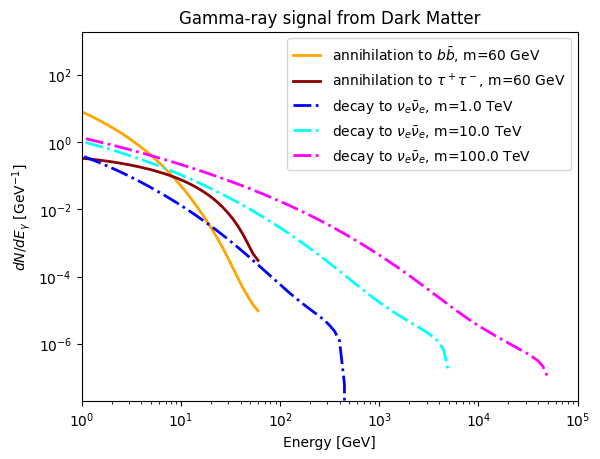

In [13]:
PPPC4_gamma = "./resources/PPPC4_table/AtProduction_gammas.dat"
bb = open_PPPC4tables(PPPC4_gamma, channel="bb", mass=60, process='ann')
tau = open_PPPC4tables(PPPC4_gamma, channel="tautau", mass=60, process='ann')
plt.loglog(bb["E"], bb["dNdE"], label=r"annihilation to $b\bar{b}$, m=60 GeV", color='orange', lw=2)
plt.loglog(tau["E"], tau["dNdE"], label=r"annihilation to $\tau^+\tau^-$, m=60 GeV", color='darkred', lw=2)

cols_nue = ['blue', 'cyan', 'magenta']
for mass in [1000, 10000, 100000]:
    nue = open_PPPC4tables(PPPC4_gamma, channel="nuenue", mass=mass, process='decay')
    plt.loglog(nue["E"], nue["dNdE"], label=r"decay to $\nu_e\bar{\nu}_e$,"+f" m={mass/1e3} TeV", ls='-.', color=cols_nue.pop(0), lw=2)
plt.legend()
plt.title("Gamma-ray signal from Dark Matter")
plt.xlim(1, 1e5)
plt.xlabel("Energy [GeV]")
plt.ylabel(r"$dN/dE_\gamma$ [GeV$^{-1}$]")